# WEB DRIVER AND GET WEBSITE

In [4]:

from bs4 import BeautifulSoup
import requests
from selenium import webdriver

# from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
# from selenium.webdriver.chrome.options import Options
chrom_path=r"D:\Software\ChromDriver\chromedriver85.exe"
driver=webdriver.Chrome(chrom_path)
# chrome_options = Options()  
chrome_options=webdriver.ChromeOptions()
# chrome_options.add_argument("--no-startup-window") 
# chrome_options.add_argument("--headless")
# chrome_options.add_argument("--window-size=%s" % WINDOW_SIZE)
# chrome_options.add_argument('window-size=0x0')
# options.add_argument('--disable-gpu') 
# chrome_options.binary_location = CHROME_PATH
#driver=webdriver.Chrome(chrome_options=chrome_options)
# driver=webdriver.Chrome(options=chrome_options)
driver.get('http://www.tsetmc.com/Loader.aspx?ParTree=15131F#')
# link=driver.find_element(By.CSS_SELECTOR, "TopIcon MwIcon MwQuery").get_attribute('innerHTML')
# حقیقی حقوقی 
driver.execute_script("mw.Settings.LoadClientType=1-mw.Settings.LoadClientType;mw.SaveParams();HideAllWindow();mw.LoadClientType();");
#آمار کلیدی
driver.execute_script("mw.Settings.LoadInstStat=1-mw.Settings.LoadInstStat;mw.SaveParams();HideAllWindow();mw.LoadInstStat();");
#تاریخچه قیمتی
driver.execute_script("mw.Settings.LoadInstHistory=1-mw.Settings.LoadInstHistory;mw.SaveParams();HideAllWindow();mw.LoadInstHistory();");


# FIND TEXT FIELD 

In [5]:
# GO TO TEXTFIELD
link=driver.find_element_by_css_selector(".MwQuery")
link.click()
link1=driver.find_element_by_css_selector(".awesome.black")
link1.click()
link2=driver.find_element_by_css_selector(".awesome.tra")
link2.click()
# link3=driver.find_element_by_css_selector(".awesome.blue")		
# link3.click()


In [6]:
# CLEAR TEXT FIELD
# driver.execute_script("mw.SelectFilter(0);mw.ShowSettings();mw.SaveParams();mw.QueryWindowFilterNames();")
# r=driver.execute_script("return document.documentElement.outerHTML")
def cleartextfld():
    textfield=driver.find_element_by_id("InputFilterCode")
    textfield.send_keys(Keys.DELETE)
    textfield.clear()



# FILTER OPTION

In [35]:
# CREATE FILTER OPTION
import pandas as pd
from IPython.display import display
from ipywidgets import widgets
df=pd.read_excel('FilterTbl.xlsx')
filtercode=''
filtername=''
option=[]
style = {'backgrond_color': 'red'}

for filn in df['filterName']:
    option.append(filn)

choose_Filter = widgets.Dropdown(layout={'width': 'max-content'},
    options=df['filterName'],    
    description='Filter Name:', style=style               
                    
)
def GetFilterCode(s):
    if s:
        fkey=df[df['filterName']==s]['filterCode']
        return fkey.values[0]
    else:        
        return 'ALL FIELD LEAVED EMPTY{}'
        
             

# display(choose_Filter)
# s=widgets.interactive(GetFilterCode,s=choose_Filter)  


In [9]:
# GET DATA FUNCTION

import re
import pandas as pd
from plotly.offline import iplot
import cufflinks as cf

def getdata():
    driver.execute_script("mw.QueryWindowSaveFilter();")
    r=driver.execute_script("return document.documentElement.outerHTML")
#     print(r.count)
    soup=BeautifulSoup(r,'lxml')
    alldiv=soup.find_all('div',{'class':'{c}'})
    market={"stock":[],"name":[],"No":[],"volume":[],"value":[],"yes":[],"last":[],"close":[],"low":[],"high":[],"eps":[],"pe":[],"open":[]}
    for a in alldiv:    
        market["stock"].append(a.find_all('div',{'class':'t0c t0c1'})[0].text ) 
        market["name"].append(a.find_all('div',{'class':'t0c t0c1'})[1].text)    
        market["No"].append(a.find_all('div',{'t0c5 ch0'})[0].text)
        market["volume"].append(a.find_all('div',{'t0c5 ch0'})[1].text)
        market["value"].append(a.find_all('div',{'t0c5 ch0'})[2].text)
        market["yes"].append(a.find_all('div',{'t0c5'})[3].text)
        market["last"].append(a.find_all('div',{'t0c t0c2 ch0'})[0].text)
        market["close"].append(a.find_all('div',{'t0c ch0'})[0].text)
        market["low"].append(a.find_all('div',{'t0c5 ch0'})[3].text)
        market["high"].append(a.find_all('div',{'t0c5 ch0'})[4].text)
        market["eps"].append(a.find_all('div',{'t0c5 ch0'})[5].text)
        market["pe"].append(a.find_all('div',{'t0c ch0'})[3].text)
        market["open"].append(a.find_all('div',{'t0c5 ch{_pf}'})[0].text)

    #     market["name"].append(a.find_all('div',{'class':'t0c t0c1'})[4].text)
    #     market["name"].append(a.find_all('div',{'class':'t0c t0c1'})[5].text)

    df=pd.DataFrame(market)
    return df

    
#     	print (a.find_all('div',{'class':'t0c t0c1'})[0].text + "--" + 
#           a.find_all('div',{'class':'t0c t0c1'})[1].text )

# vl=pd.to_numeric(df.volume.str.replace('M','000000'))
# cl=pd.to_numeric(df.close.str.replace(',',''))
# op=pd.to_numeric(df.open.str.replace(',',''))
# lw=pd.to_numeric(df.low.str.replace(',',''))
# hi=pd.to_numeric(df.high.str.replace(',',''))

# qf=cf.QuantFig(df,title='First Quant Figure',legend='top',name='GS')
# iplot(qf.iplot(asFigure=True))


# CREATE COSTUM FILTER

In [67]:
import re
from tkinter_frm import tkinterforms
from colorama import Fore, Back, Style
# cleartextfld()

def runflt():    
    if s and s[0]!=""  and s[1]!="" and s[1]!="" and s[3]!="" :    
        textfield=driver.find_element_by_id("InputFilterCode")
        textfield.send_keys(GetFilterCode(s[0]).format(s[1])+s[2]+s[3])
        num=re.findall(r'\d+', s[2])
        filtername+="\033[40m"+s[0].format(s[1])+' {0:,}'.format(int(num[0]))+"\033[30m" 
        print(filtername)
        driver.execute_script('mw.QueryWindowSaveFilter()')
        getdata()
    else:
        print('')
s=tkinterforms().CreateComboFunc(3,option)
if s[3]=='&':
    tkinterforms().CreateComboFunc(3,option)
    runflt()
else:
    print('find stop') 

# print (" "+ "\033[01;41m" + " " +"\033[01;46m" + " " + "\033[01;42m")

UnboundLocalError: local variable 'filtername' referenced before assignment

# PLOTING

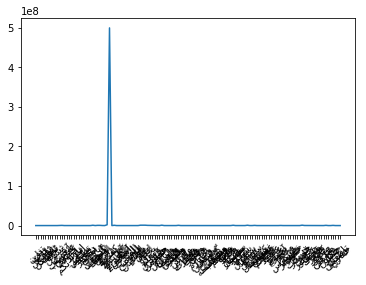

In [183]:
# driver.quit()
%matplotlib inline
from bidi.algorithm import get_display
import arabic_reshaper
import matplotlib.pyplot as plt
import matplotlib.font_manager

# df.loc[df['volume'].str.contains('M'),'volume']='1000'
df['volume']= df.volume.str.replace(',','')
df['volume']= df.volume.str.replace('M','000000')
df['volume']= df.volume.str.replace('B','000000000')    
    
vl=pd.to_numeric(df['volume'])
cl=pd.to_numeric(df.close.str.replace(',',''))
# op=pd.to_numeric(df.open.str.replace(',',''))
# lw=pd.to_numeric(df.low.str.replace(',',''))
# hi=pd.to_numeric(df.high.str.replace(',',''))
# matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# plt.rcParams['font.family']='BNazanin'
# plt.rcParams['font.size']=14
changedname=[]
for a in df['stock']:
    reshaped_text = arabic_reshaper.reshape(a)
    changedname.append(get_display(reshaped_text))
#     df['stock']=get_display(reshaped_text)
plt.plot(changedname,vl) 
plt.xticks(changedname, rotation=45)  
plt.show()
